In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# project directory
current_dir = 'Home Credit_Kaggle'

# set the project folder as current working directory
import os
complete_path = os.path.join('/content/drive/My Drive/Colab Notebooks/',current_dir)
os.chdir(complete_path)

# create output folder for the eda if not already present
out_path = os.path.join(complete_path,'eda_basic')
if not os.path.isdir(out_path):
  os.mkdir(out_path)

In [ ]:
import numpy as np
import pandas as pd

#High Level Data Analysis

In this notebook we are going to perform some very basic EDA on the seven files of data, to help us get a gist of what data is, and some feel of the data.

# Check for each file
1. which columns are categorical and which are numerical (by determining the number of unique values) 
2. percentage of null values in each column


##Basically for each file, we will check following things
1. Which columns are categorical and which are numerical: We will print out a sample of some values in the field, and determine the number of unique values. This will help us learn how many numerical and categorical values are there
2. Percentage of null values in each column: This could be an important criteria in the data selection and cleaning. Since there are seven files each with considerable data, which could lead to quite high dimensionality, percentage of null values could be the first simple criteria to select the relevant features.

We will print out the above information in notebook, as well as store it to CSV, since it could be useful in later stages.


## Application Train CSV file

In [ ]:
# load application_train.csv
app_train = pd.read_csv('data/application_train.csv')
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# check for unique values and null values in each column

# initialize output spool
f = open('eda_basic/eda_of_fields_app_train.csv','w')

# print header
print('Sno Column name \t No of unique values \t Percentage of    Upto 2 Unique values')
print('                            in columns \t\t  null values')

for i,col in enumerate(app_train.columns):
  # below columns have nan + string values so np.unique to find unique values, does not work
  if (col not in ('NAME_TYPE_SUITE','OCCUPATION_TYPE','FONDKAPREMONT_MODE',
                  'HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE')):
    # for homogenous columns (string/number only or nan + number)
    v = np.unique(app_train[col]) # unique values
    l = len(v) # no of unique values
    n = (sum(app_train[col].isna())/len(app_train[col]))*100 # % of null values

    # print the row on screen
    print("{:3d} {:<30} {:7d} \t  {:.2f}% \t {}".format(i,col,l,n,v[:2]))
    
    # store the important data in output spool
    f.write("{},{},{},{:.2f}\n".format(i,col,l,n))
  
  else:
    # for heterogenous columns (string + nan)
    v = list(set(app_train[col])) # unique values
    l = len(v) - 1 # no of unique values, subtracted 1 to remove count of nan
    n = (sum(app_train[col].isna())/len(app_train[col])) * 100 # % of null values

    # print the row on screen
    print("{:3d} {:<30} {:<7d} \t  {:.2f}% \t {}".format(i,col,l,n,v[:3]))

    # store the important data in output spool
    f.write("{},{},{},{:.2f}\n".format(i,col,l,n))

f.close()

Sno Column name 	 No of unique values 	 Percentage of    Upto 2 Unique values
                            in columns 		  null values
  0 SK_ID_CURR                      307511 	  0.00% 	 [100002 100003]
  1 TARGET                               2 	  0.00% 	 [0 1]
  2 NAME_CONTRACT_TYPE                   2 	  0.00% 	 ['Cash loans' 'Revolving loans']
  3 CODE_GENDER                          3 	  0.00% 	 ['F' 'M']
  4 FLAG_OWN_CAR                         2 	  0.00% 	 ['N' 'Y']
  5 FLAG_OWN_REALTY                      2 	  0.00% 	 ['N' 'Y']
  6 CNT_CHILDREN                        15 	  0.00% 	 [0 1]
  7 AMT_INCOME_TOTAL                  2548 	  0.00% 	 [25650. 26100.]
  8 AMT_CREDIT                        5603 	  0.00% 	 [45000. 47970.]
  9 AMT_ANNUITY                      13684 	  0.00% 	 [1615.5 1980. ]
 10 AMT_GOODS_PRICE                   1280 	  0.09% 	 [40500. 45000.]
 11 NAME_TYPE_SUITE                7       	  0.42% 	 [nan, 'Family', 'Other_A']
 12 NAME_INCOME_TYPE                 

###Observations

1. Fields with non-numeric values can be treated as Categorical fields
2. Other fields can be treated as Numerical fields
3. A lot of fields have more than 50% values as NULL. It could be a good idea to skip such fields, or in case of categorical fields use NULL as a categorical value.

## Bureau and Bureau balance CSV files

In [ ]:
# load bureau.csv
bureau = pd.read_csv('data/bureau.csv')
print(bureau.shape)
bureau.head()

(1716428, 17)


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
# check for unique values and null values in each column

# initialize output spool
f = open('eda_basic/eda_of_fields_bureau.csv','w')

# print header
print('Sno Column name \t No of unique values \t Percentage of    Upto 2 Unique values')
print('                            in columns \t\t  null values')

for i,col in enumerate(bureau.columns):
  v = np.unique(bureau[col]) # unique values
  l = len(v) # no of unique values
  n = (sum(bureau[col].isna())/len(bureau[col]))*100 # % of null values

  # print the row on screen
  print("{:3d} {:<30} {:7d} \t  {:.2f}% \t {}".format(i,col,l,n,v[:5]))
  
  # store the important data in output spool
  f.write("{},{},{},{:.2f}\n".format(i,col,l,n)) 

f.close()

Sno Column name 	 No of unique values 	 Percentage of    Upto 2 Unique values
                            in columns 		  null values
  0 SK_ID_CURR                      305811 	  0.00% 	 [100001 100002 100003 100004 100005]
  1 SK_ID_BUREAU                   1716428 	  0.00% 	 [5000000 5000001 5000002 5000003 5000004]
  2 CREDIT_ACTIVE                        4 	  0.00% 	 ['Active' 'Bad debt' 'Closed' 'Sold']
  3 CREDIT_CURRENCY                      4 	  0.00% 	 ['currency 1' 'currency 2' 'currency 3' 'currency 4']
  4 DAYS_CREDIT                       2923 	  0.00% 	 [-2922 -2921 -2920 -2919 -2918]
  5 CREDIT_DAY_OVERDUE                 942 	  0.00% 	 [0 1 2 3 4]
  6 DAYS_CREDIT_ENDDATE             119649 	  6.15% 	 [-42060. -42056. -42042. -42041. -42013.]
  7 DAYS_ENDDATE_FACT               636570 	  36.92% 	 [-42023.  -3042.  -2922.  -2919.  -2917.]
  8 AMT_CREDIT_MAX_OVERDUE         1192739 	  65.51% 	 [0.    0.045 0.09  0.135 0.18 ]
  9 CNT_CREDIT_PROLONG                  10 	  0.

###Observations

1. Fields with non-numeric values can be treated as Categorical fields
2. Other fields can be treated as Numerical fields
3. Two fields have more than 65% values as NULL (AMT_CREDIT_MAX_OVERDUE and AMT_ANNUITY). It could be a good idea to skip such fields.

In [ ]:
# load bureau_balance.csv
bureau_bal = pd.read_csv('data/bureau_balance.csv')
print(bureau_bal.shape)
bureau_bal.head()

(27299925, 3)


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
# check for unique values and null values in each column

# initialize output spool
f = open('eda_basic/eda_of_fields_bureau_bal.csv','w')

# print header
print('Sno Column name \t No of unique values \t Percentage of    Upto 2 Unique values')
print('                            in columns \t\t  null values')

for i,col in enumerate(bureau_bal.columns):
  v = np.unique(bureau_bal[col]) # unique values
  l = len(v) # no of unique values
  n = (sum(bureau_bal[col].isna())/len(bureau_bal[col]))*100 # % of null values

  # print the row on screen
  print("{:3d} {:<30} {:7d} \t  {:.2f}% \t {}".format(i,col,l,n,v[:5]))
  
  # store the important data in output spool
  f.write("{},{},{},{:.2f}\n".format(i,col,l,n)) 

f.close()

Sno Column name 	 No of unique values 	 Percentage of    Upto 2 Unique values
                            in columns 		  null values
  0 SK_ID_BUREAU                    817395 	  0.00% 	 [5001709 5001710 5001711 5001712 5001713]
  1 MONTHS_BALANCE                      97 	  0.00% 	 [-96 -95 -94 -93 -92]
  2 STATUS                               8 	  0.00% 	 ['0' '1' '2' '3' '4']


###Observations

1. There are only 3 fields in this file. Other than ID field, MONTHS_BALANCE can be treated as numerical and STATUS can be treated as categorical.
2. This file does not have any NULL values despite being such a huge record count (27M records), which is remarkable

## Previous Applications CSV file

In [ ]:
# load previous_application.csv
prev_app = pd.read_csv('data/previous_application.csv')
print(prev_app.shape)
prev_app.head()

(1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check for unique values and null values in each column

# initialize output spool
f = open('eda_basic/eda_of_fields_prev_applications.csv','w')

# print header
print('Sno Column name \t No of unique values \t Percentage of    Upto 2 Unique values')
print('                            in columns \t\t  null values')

for i,col in enumerate(prev_app.columns):
  # below columns have nan + string values so np.unique does not work
  if (col not in ('NAME_TYPE_SUITE','PRODUCT_COMBINATION')):
    # for homogenous columns (string/number only or nan + number)
    v = np.unique(prev_app[col]) # unique values
    l = len(v) # no of unique values
    n = (sum(prev_app[col].isna())/len(prev_app[col]))*100 # % of null values

    # print the row on screen
    print("{:3d} {:<30} {:7d} \t  {:.2f}% \t {}".format(i,col,l,n,v[:2]))
    
    # store the important data in output spool
    f.write("{},{},{},{:.2f}\n".format(i,col,l,n))
  
  else:
    # for heterogenous columns (string + nan)
    v = list(set(prev_app[col])) # unique values
    l = len(v) - 1 # no of unique values, subtracted 1 to remove count of nan
    n = (sum(prev_app[col].isna())/len(prev_app[col])) * 100 # % of null values

    # print the row on screen
    print("{:3d} {:<30} {:<7d} \t  {:.2f}% \t {}".format(i,col,l,n,v[:3]))

    # store the important data in output spool
    f.write("{},{},{},{:.2f}\n".format(i,col,l,n))

f.close()

Sno Column name 	 No of unique values 	 Percentage of    Upto 2 Unique values
                            in columns 		  null values
  0 SK_ID_PREV                     1670214 	  0.00% 	 [1000001 1000002]
  1 SK_ID_CURR                      338857 	  0.00% 	 [100001 100002]
  2 NAME_CONTRACT_TYPE                   4 	  0.00% 	 ['Cash loans' 'Consumer loans']
  3 AMT_ANNUITY                     730194 	  22.29% 	 [  0.   579.78]
  4 AMT_APPLICATION                  93885 	  0.00% 	 [   0. 3456.]
  5 AMT_CREDIT                       86804 	  0.00% 	 [   0. 3456.]
  6 AMT_DOWN_PAYMENT                925122 	  53.64% 	 [-0.9  -0.45]
  7 AMT_GOODS_PRICE                 479400 	  23.08% 	 [   0. 3456.]
  8 WEEKDAY_APPR_PROCESS_START           7 	  0.00% 	 ['FRIDAY' 'MONDAY']
  9 HOUR_APPR_PROCESS_START             24 	  0.00% 	 [0 1]
 10 FLAG_LAST_APPL_PER_CONTRACT          2 	  0.00% 	 ['N' 'Y']
 11 NFLAG_LAST_APPL_IN_DAY               2 	  0.00% 	 [0 1]
 12 RATE_DOWN_PAYMENT              1

###Observations

1. This file is quite similar to Application Train file in structure. Therefore, fields with non-numerical values can be treated as categorical fields.
2. Other fields can be treated as Numerical fields
3. The last 6 fields have 40% null values. Other than these RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED are completely useless since these have 99% of Null values, while RATE_DOWN_PAYMENT, AMT_DOWN_PAYMENT and NAME_TYPE_SUITE have almost half values as Null. 

## POS Cash Balance CSV file

In [ ]:
# load POS_CASH_balance.csv
pos_cash_bal = pd.read_csv('data/POS_CASH_balance.csv')
print(pos_cash_bal.shape)
pos_cash_bal.head()

(10001358, 8)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
# check for unique values and null values in each column

# initialize output spool
f = open('eda_basic/eda_of_fields_pos_cash_bal.csv','w')

# print header
print('Sno Column name \t No of unique values \t Percentage of    Upto 2 Unique values')
print('                            in columns \t\t  null values')

for i,col in enumerate(pos_cash_bal.columns):
  v = np.unique(pos_cash_bal[col]) # unique values
  l = len(v) # no of unique values
  n = (sum(pos_cash_bal[col].isna())/len(pos_cash_bal[col]))*100 # % of null values

  # print the row on screen
  print("{:3d} {:<30} {:7d} \t  {:.2f}% \t {}".format(i,col,l,n,v[:5]))
  
  # store the important data in output spool
  f.write("{},{},{},{:.2f}\n".format(i,col,l,n)) 

f.close()

Sno Column name 	 No of unique values 	 Percentage of    Upto 2 Unique values
                            in columns 		  null values
  0 SK_ID_PREV                      936325 	  0.00% 	 [1000001 1000002 1000003 1000004 1000005]
  1 SK_ID_CURR                      337252 	  0.00% 	 [100001 100002 100003 100004 100005]
  2 MONTHS_BALANCE                      96 	  0.00% 	 [-96 -95 -94 -93 -92]
  3 CNT_INSTALMENT                   26144 	  0.26% 	 [1. 2. 3. 4. 5.]
  4 CNT_INSTALMENT_FUTURE            26166 	  0.26% 	 [0. 1. 2. 3. 4.]
  5 NAME_CONTRACT_STATUS                 9 	  0.00% 	 ['Active' 'Amortized debt' 'Approved' 'Canceled' 'Completed']
  6 SK_DPD                            3400 	  0.00% 	 [0 1 2 3 4]
  7 SK_DPD_DEF                        2307 	  0.00% 	 [0 1 2 3 4]


###Observations

1. Only one field NAME_CONTRACT STATUS can be treated as Categorical field
2. Other fields can be treated as Numerical fields
3. Other than two fields no other field has null value. Even those two fields have less than 1% of null values.

## Instalments Payments CSV file

In [ ]:
# load installments_payments.csv
inst_payments = pd.read_csv('data/installments_payments.csv')
print(inst_payments.shape)
inst_payments.head()

(13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
# check for unique values and null values in each column of bureau csv file

# initialize output spool
f = open('eda_basic/eda_of_fields_instalments_payments.csv','w')

# print header
print('Sno Column name \t No of unique values \t Percentage of    Upto 2 Unique values')
print('                            in columns \t\t  null values')

for i,col in enumerate(inst_payments.columns):
  v = np.unique(inst_payments[col]) # unique values
  l = len(v) # no of unique values
  n = (sum(inst_payments[col].isna())/len(inst_payments[col]))*100 # % of null values

  # print the row on screen
  print("{:3d} {:<30} {:7d} \t  {:.2f}% \t {}".format(i,col,l,n,v[:5]))
  
  # store the important data in output spool
  f.write("{},{},{},{:.2f}\n".format(i,col,l,n)) 

f.close()

Sno Column name 	 No of unique values 	 Percentage of    Upto 2 Unique values
                            in columns 		  null values
  0 SK_ID_PREV                      997752 	  0.00% 	 [1000001 1000002 1000003 1000004 1000005]
  1 SK_ID_CURR                      339587 	  0.00% 	 [100001 100002 100003 100004 100005]
  2 NUM_INSTALMENT_VERSION              65 	  0.00% 	 [0. 1. 2. 3. 4.]
  3 NUM_INSTALMENT_NUMBER              277 	  0.00% 	 [1 2 3 4 5]
  4 DAYS_INSTALMENT                   2922 	  0.00% 	 [-2922. -2921. -2920. -2919. -2918.]
  5 DAYS_ENTRY_PAYMENT                5944 	  0.02% 	 [-4921. -3160. -3129. -3115. -3096.]
  6 AMT_INSTALMENT                  902539 	  0.00% 	 [0.    0.045 0.09  0.135 0.18 ]
  7 AMT_PAYMENT                     947140 	  0.02% 	 [0.    0.045 0.09  0.135 0.18 ]


###Observations

1. This is the only file with all numerical values
2. The purity of data is remarkable, almost zero null values in all fields

## Credit Card Balance CSV file

In [ ]:
# load credit_card_balance.csv
credit_card_bal = pd.read_csv('data/credit_card_balance.csv')
print(credit_card_bal.shape)
credit_card_bal.head()

(3840312, 23)


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
# check for unique values and null values in each column

# initialize output spool
f = open('eda_basic/eda_of_fields_credit_card_balance.csv','w')

# print header
print('Sno Column name \t No of unique values \t Percentage of    Upto 2 Unique values')
print('                            in columns \t\t  null values')

for i,col in enumerate(credit_card_bal.columns):
  v = np.unique(credit_card_bal[col]) # unique values
  l = len(v) # no of unique values
  n = (sum(credit_card_bal[col].isna())/len(credit_card_bal[col]))*100 # % of null values

  # print the row on screen
  print("{:3d} {:<30} {:7d} \t  {:.2f}% \t {}".format(i,col,l,n,v[:5]))
  
  # store the important data in output spool
  f.write("{},{},{},{:.2f}\n".format(i,col,l,n)) 

f.close()

Sno Column name 	 No of unique values 	 Percentage of    Upto 2 Unique values
                            in columns 		  null values
  0 SK_ID_PREV                      104307 	  0.00% 	 [1000018 1000030 1000031 1000035 1000077]
  1 SK_ID_CURR                      103558 	  0.00% 	 [100006 100011 100013 100021 100023]
  2 MONTHS_BALANCE                      96 	  0.00% 	 [-96 -95 -94 -93 -92]
  3 AMT_BALANCE                    1347904 	  0.00% 	 [-420250.185 -261471.015 -259848.945 -240305.985 -223224.21 ]
  4 AMT_CREDIT_LIMIT_ACTUAL            181 	  0.00% 	 [    0  4500  9000 13500 18000]
  5 AMT_DRAWINGS_ATM_CURRENT        752083 	  19.52% 	 [-6827.31     0.      45.      90.     135.  ]
  6 AMT_DRAWINGS_CURRENT            187005 	  0.00% 	 [-6.21162e+03 -1.68750e+03 -5.19570e+02  0.00000e+00  4.50000e-02]
  7 AMT_DRAWINGS_OTHER_CURRENT      751648 	  19.52% 	 [  0.   234.   280.8  459.   461.25]
  8 AMT_DRAWINGS_POS_CURRENT        918564 	  19.52% 	 [0.    0.045 0.225 0.45  0.495]


###Observations

1. Only one field (NAME_CONTRACT STATUS) can be treated as Categorical field
2. Other fields can be treated as Numerical fields
3. The null values for this file are moderate and less than 20% for all fields. All fields can be used after imputation.

#Check whether the dataset is balanced or not

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


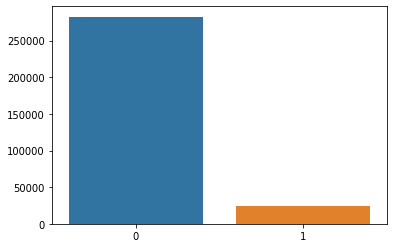

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# extract unique Y values and their counts
Y_unique, Y_counts = np.unique(app_train['TARGET'],return_counts=True)

# plot the variation
sns.barplot(Y_unique,Y_counts)
plt.show()

##Conclusion
Dataset is highly imbalanced, therefore it will be challenging to achieve to not overfit and acheive high AUC.